<a href="https://colab.research.google.com/github/snps-erwinc/Training/blob/main/SeqClassification_LSTM_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN and LSTM FOR SEQUENCE CLASSIFICATION**

Convolutional neural networks excel at learning the spatial structure in input data.

The IMDB review data does have a one-dimensional spatial structure in the sequence of words in reviews, and the CNN may be able to pick out invariant features for the good and bad sentiment. This learned spatial feature may then be learned as sequences by an LSTM layer.

In [ ]:
# LSTM and CNN for sequence classification in the IMDB dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# load the dataset but only keep the top n words, zero the rest
# Split into training and test data
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

Next, we need to truncate and pad the input sequences, so they are all the same length for modeling. The model will learn that the zero values carry no information. The sequences are not the same length in terms of content, but same-length vectors are required to perform the computation in Keras.

In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

We can now define, compile and fit our LSTM model.

The first layer is the Embedded layer that uses 32-length vectors to represent each word. The next layer is the LSTM layer with 100 memory units (smart neurons). Finally, because this is a classification problem, we will use a Dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 predictions for the two classes (good and bad) in the problem.

Because it is a binary classification problem, log loss is used as the loss function (binary_crossentropy in Keras). The efficient ADAM optimization algorithm is used. The model is fit for only two epochs because it quickly overfits the problem. A large batch size of 64 reviews is used to space out weight updates.

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

"None" depicts the batch size, which is not fixed and can vary depending on the input data and the batch size you choose during training or inference.

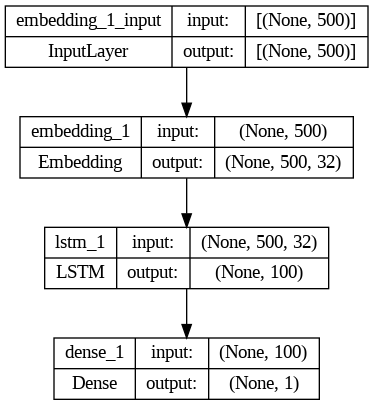

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 41s 99ms/step - loss: 0.4649 - accuracy: 0.7758 - val_loss: 0.3731 - val_accuracy: 0.8400
Epoch 2/3
391/391 [==============================] - 23s 59ms/step - loss: 0.2810 - accuracy: 0.8872 - val_loss: 0.3146 - val_accuracy: 0.8730
Epoch 3/3
391/391 [==============================] - 18s 46ms/step - loss: 0.2390 - accuracy: 0.9082 - val_loss: 0.3306 - val_accuracy: 0.8722


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.22%


PREDICTING SENTIMENTS FOR NEW REVIEWS

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to preprocess and predict sentiment of a new review
def predict_review(review):
    # Preprocess the review text
    word_index = imdb.get_word_index()
    review = text_to_word_sequence(review)
    review = [word_index.get(word, 0) + 3 for word in review if word_index.get(word, 0) < (top_words - 3)]
    review = pad_sequences([review], maxlen=max_review_length)
    print(review)

    # Predict sentiment
    prediction = model.predict(review)
    print("Positive" if prediction[0][0] > 0.5 else "Negative")

# Example usage
new_review = "It was a bad movie"
predict_review(new_review)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

The IMDB word index is a dictionary provided by the IMDB dataset in the tensorflow.keras.datasets.imdb module. This dictionary maps words to their integer indices based on the frequency of their occurrence in the dataset. The words that appear most frequently in the dataset are assigned lower indices, making it easier to process and model the text data. Here's an example:

Key Points:

  Frequency-based Indexing: Words that occur more frequently are assigned lower indices.
  Reserved Indices:
        0 is reserved for padding.
        1 is reserved for the start of a sequence.
        2 is reserved for unknown words.

REF: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/